# **How AWS Lambda Works**
To understand event driven architectures like AWS Lambda, you need to understand the events themselves. This section dives in to how events initiate functions to invoke the code within. 

## Invocation models for running Lambda functions

Event sources can invoke a Lambda function in three general patterns. These patterns are called invocation models. Each invocation model is unique and addresses a different application and developer needs. The invocation model you use for your Lambda function often depends on the event source you are using. It's important to understand how each invocation model initializes functions and handles errors and retries.

To learn more about the different invocation models, select each tab. 

## Synchronous invocation

When you invoke a function synchronously, Lambda runs the function and waits for a response. When the function completes, Lambda returns the response from the function's code with additional data, such as the version of the function that was invoked. Synchronous events expect an immediate response from the function invocation. 



With this model, there are no built-in retries. You must manage your retry strategy within your application code.



The following diagram shows clients invoking a Lambda function synchronously. Lambda sends the events directly to the function and sends the function response directly back to the invoker. 
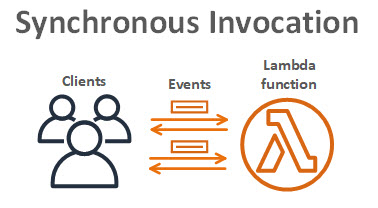

### Synchronous AWS Services
The following AWS services invoke Lambda synchronously:

- Amazon API Gateway
- Amazon Cognito
- AWS CloudFormation
- Amazon Alexa
- Amazon Lex
- Amazon CloudFront

## Asynchronous invocation

When you invoke a function asynchronously, events are queued and the requestor doesn't wait for the function to complete. This model is appropriate when the client doesn't need an immediate response. 



With the asynchronous model, you can make use of destinations. Use destinations to send records of asynchronous invocations to other services. (Select the Destinations tab for more information.)



The following diagram shows clients invoking a Lambda function asynchronously. Lambda queues events before sending them to the function.

### Asynch AWS Service Integration

The following AWS services invoke Lambda asynchronously: 

- Amazon SNS 

- Amazon S3

- Amazon EventBridge 

### Destinations

A destination can send records of asynchronous invocations to other services. You can configure separate destinations for events that fail processing and for events that process successfully. You can configure destinations on a function, a version, or an alias, similarly to how you can configure error handling settings. With destinations, you can address errors and successes without needing to write more code. 

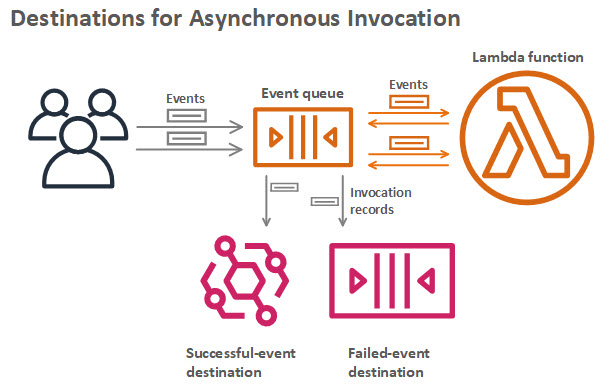

## Polling invocation

### Polling 
This invocation model is designed to integrate with AWS streaming and queuing based services with no code or server management. Lambda will poll (or watch) these services, retrieve any matching events, and invoke your functions. This invocation model supports the following services:

- Amazon Kinesis
- Amazon SQS
- Amazon DynamoDB Streams

With this type of integration, AWS will manage the poller on your behalf and perform synchronous invocations of your function. 



With this model, the retry behavior varies depending on the event source and its configuration.

## Invocation model error behavior

When deciding how to build your functions, consider how each invocation method handles errors. The following chart provides a quick outline of the error handling behavior of each invocation model.
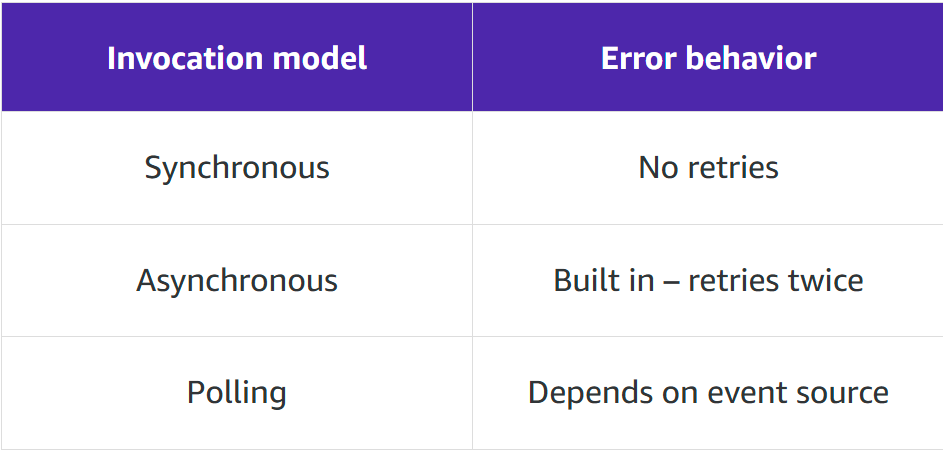

## Lambda execution environment

Lambda invokes your function in an execution environment, which is a secure and isolated environment. The execution environment manages the resources required to run your function. The execution environment also provides lifecycle support for the function's runtime and any external extensions associated with your function. 

### Execution environment lifecycle
When you create your Lambda function, you specify configuration information, such as the amount of available memory and the maximum invocation time allowed for your function. Lambda uses this information to set up the execution environment.

The function's runtime and each external extension are processes that run within the execution environment. Permissions, resources, credentials, and environment variables are shared between the function and the extensions.

### Step 1

**Init phase**

In this phase, Lambda creates or unfreezes an execution environment with the configured resources, downloads the code for the function and all layers, initializes any extensions, initializes the runtime, and then runs the function’s initialization code (the code outside the main handler). 

The Init phase happens either during the first invocation, or before function invocations if you have enabled provisioned concurrency.

The Init phase is split into three sub-phases: 

- Extension init - starts all extensions
- Runtime init - bootstraps the runtime
- Function init - runs the function's static code

These sub-phases ensure that all extensions and the runtime complete their setup tasks before the function code runs.

### Step 2

**Invoke phase**
In this phase, Lambda invokes the function handler. After the function runs to completion, Lambda prepares to handle another function invocation. 

### Step 3

**Shutdown phase**
If the Lambda function does not receive any invocations for a period of time, this phase initiates. In the Shutdown phase, Lambda shuts down the runtime, alerts the extensions to let them stop cleanly, and then removes the environment. Lambda sends a shutdown event to each extension, which tells the extension that the environment is about to be shut down.

### Summary
When you write your function code, do not assume that Lambda automatically reuses the execution environment for subsequent function invocations. Other factors may require Lambda to create a new execution environment, which can lead to unexpected results. Always test to optimize the functions and adjust the settings to meet your needs.

## Performance optimization

Serverless applications can be extremely performant, thanks to the ease of parallelization and concurrency. While the Lambda service manages scaling automatically, you can optimize the individual Lambda functions used in your application to reduce latency and increase throughput. 


### Cold and warm starts

A cold start occurs when a new execution environment is required to run a Lambda function. When the Lambda service receives a request to run a function, the service first prepares an execution environment. During this step, the service downloads the code for the function, then creates the execution environment with the specified memory, runtime, and configuration. Once complete, Lambda runs any initialization code outside of the event handler before finally running the handler code. 

In a warm start, the Lambda service retains the environment instead of destroying it immediately. This allows the function to run again within the same execution environment. This saves time by not needing to initialize the environment.  

Select each of the following numbered markers for more information on cold and warm starts.
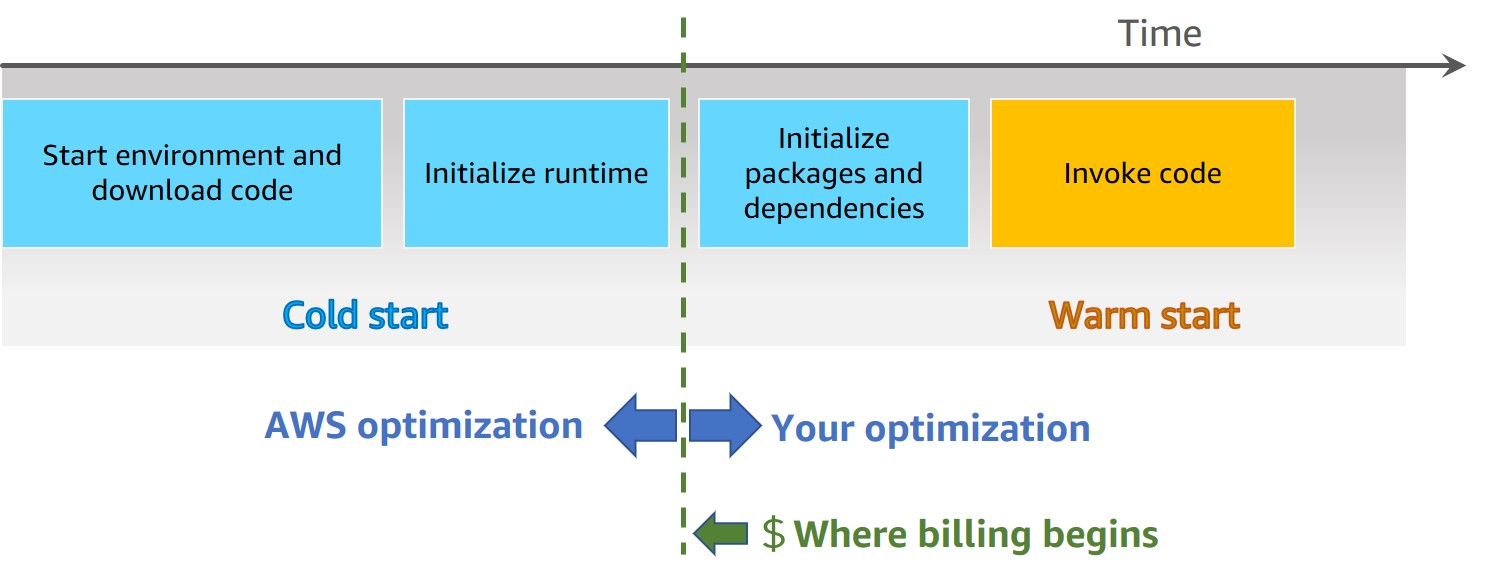

## Best practice: Minimize cold start times

When you invoke a Lambda function, the invocation is routed to an execution environment to process the request. If the environment is not already initialized, the start-up time of the environment adds to latency. If a function has not been used for some time, if more concurrent invocations are required, or if you update a function, new environments are created.  Creation of these environments can introduce latency for the invocations that are routed to a new environment. This latency is implied when using the term cold start. For most applications, this additional latency is not a problem. However, for some synchronous models, this latency can inhibit optimal performance. It is critical to understand latency requirements and try to optimize your function for peak performance. 

After optimizing your function, another way to minimize cold starts is to use provisioned concurrency. **Provisioned concurrency** is a Lambda feature that prepares concurrent execution environments before invocations.

If you need predictable function start times for your workload, provisioned concurrency ensures the lowest possible latency. This feature keeps your functions initialized and warm, and ready to respond in double-digit milliseconds at the scale you provision. Unlike with on-demand Lambda, this means that all setup activities happen before invocation, including running the initialization code.

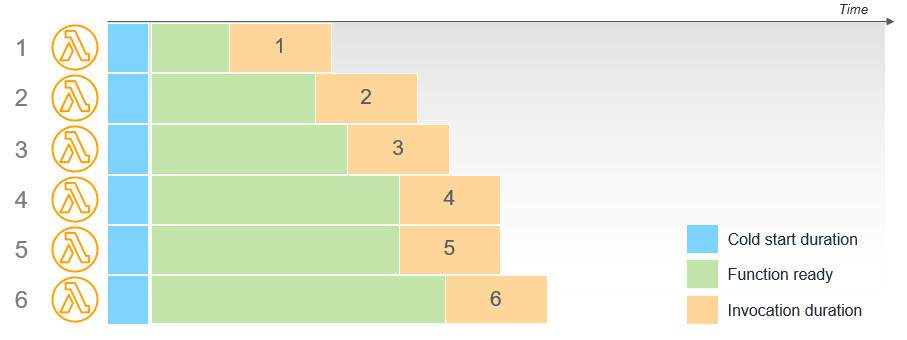

## Best practice: Write functions to take advantage of warm starts



### 1
Store and reference dependencies locally.


### 2
Limit re-initialization of variables.


### 3
Add code to check for and reuse existing connections.


### 4
Use tmp space as transient cache.


### 5
Check that background processes have completed.